### Scientific Question: Which is the better model species, Mus musculus (house mouse) or Pan troglodytes (chimpanzee), for testing asthma caused by the interleukin-13 gene in humans?

Interleukin-13 (IL-13) is a regulatory gene that is responsible for allergen induced immune responses.  The gene is similar to IL-4 in function but targets fewer cells which allows a focus on the epithelial cells that line the lungs.    

There are numerous studies on the connection between IL-13 and asthma but no inhibiting drugs have been created for bronchial IL-13 immune responses.  The data on the IL-13 gene can be obtained from the UniProt database (https://www.uniprot.org/). 

The database website states that:

"The Universal Protein Resource (UniProt) is a comprehensive resource for protein sequence and annotation data. The UniProt consortium and host institutions EMBL-EBI, SIB and PIR are committed to the long-term preservation of the UniProt databases. Across the three institutes more than 100 people are involved through different tasks such as database curation, software development and support."

### Scientific Hypothesis: If humans and chimpanzees have more similarities between their Interleukin-13 gene sequences then the dotplot will show a near continuous line of dots when compared to breaks in the mouse dotplot, therefore making chimpanzees the better model species.

UniProt contains over 1000 variants of the IL-13 gene in numerous species.  The genome of a human, mouse, and chimpanzee were saved as a fasta file and read in this code to be used for pairwise sequence alignments.  The three genomes will be compared to find which genome best matches the human genome for the IL-13 gene.  The sequences will also be plotted on a dotplot to identify regions with close similarity.  The genome with the greatest similarity to the human genome will be selected to be used as a model for testing asthma in poeple.

The gene sequence for the IL-13 protein is taken from https://www.uniprot.org/uniprot/P35225 (for humans also called Homo sapiens), https://www.uniprot.org/uniprot/P20109 (for mice also called Mus musculus), https://www.uniprot.org/uniprot/P61126(for chimpanzees also called Pan troglodytes).  The UniProt database already has the gene in FASTA format.  Simply search the gene of interest and within the page, use ctrl+F and type in FASTA to find the download link.  Click on it and copy all the information in the pop-up window.  Then go to Jupyter notebook, open a new text file and paste in the information from the FASTA link, label the file as IL13_Human(Chimpanzee or Mouse).fasta.  

### Part 1: Load the Packages

In [4]:
import matplotlib.pyplot as plt                      # A tool that allows the visualization of data in the form of plots
import pandas as pd                                  # A data manipulation tool that uses data in tables 
import numpy as np                                   # Another data manipulation tool that uses data in arrays
from sklearn.linear_model import LinearRegression    # Allows the class LinearRegression to be called an used to implement a linear regression
import scipy as scip                                 # Used for manipulating numerical code, extension of NumPy
import Bio                                           # A set of tools designed for bioinformatics computations 
from Bio import pairwise2                            # A module that allows you to calculate the  best possible sequence alignment
from Bio.Seq import Seq                              # A module from the Bio package, lets you store the fasta file as a string
from Bio import AlignIO                              # A module from the Bio package, reads alignment data files
from Bio import SeqIO                                # A module from the Bio package, inputs and outputs interface for sequence files
from Bio.pairwise2 import format_alignment           # Used to show the alignment of two sequences

### Part 2: Load in the data and perform Bioinformatics Analyses (RNA Sequencing & Similarity Analyses)

The FASTA file contains information on the organism, gene ID, chromosome, and gene sequence.  The file provides the entire gene's nucleotide sequence for a specific animal.

In the code below, we read the nucleotide sequence from the fna file and run a pairwise sequence alignment and compare each of the three genomes by storing the similarietes and using matplotlib to create a dotplot and show the animal whose IL-13 gene is most similar to humans.

In [5]:
# read the Interleukin-13 gene file for human, mouse, and chimpanzee
human = SeqIO.read(open("IL13_Human.fasta"), "fasta")
mouse = SeqIO.read(open("IL13_Mouse.fasta"), "fasta")
chimpanzee = SeqIO.read(open("IL13_Chimpanzee.fasta"), "fasta")
 
# printing human, mouse, and chimpanzee gene sequences, print() creates a space to make each line easier to read
print(human)
print()
print(mouse)
print()
print(chimpanzee)
print()

#runs a pairwise alignment test on the human and mouse sequences
test_alignments = pairwise2.align.localxx(human,mouse) 

#set variable equal a equal to 0 to prevent printing alignment multiple times
a = 0

#stores each letter in the sequence so it can be compared
for alignment in test_alignments:

# if statement to stop printing alignment after one time
    if a>=1: break

#prints the alignment between the two sequences
    print(format_alignment(*alignment))

#changes the value of the variable to make the if statement true
    a+=1

#repeat of the above pairwise alignment but between the human and chimpanzee sequences
b=0
test_alignments2 = pairwise2.align.localxx(human,chimpanzee) 
for alignment2 in test_alignments2:
    if b>=1: break
    print(format_alignment(*alignment2)) 
    b+=1

ID: sp|P35225|IL13_HUMAN
Name: sp|P35225|IL13_HUMAN
Description: sp|P35225|IL13_HUMAN Interleukin-13 OS=Homo sapiens OX=9606 GN=IL13 PE=1 SV=2
Number of features: 0
Seq('MHPLLNPLLLALGLMALLLTTVIALTCLGGFASPGPVPPSTALRELIEELVNIT...RFN')

ID: sp|P20109|IL13_MOUSE
Name: sp|P20109|IL13_MOUSE
Description: sp|P20109|IL13_MOUSE Interleukin-13 OS=Mus musculus OX=10090 GN=Il13 PE=1 SV=1
Number of features: 0
Seq('MALWVTAVLALACLGGLAAPGPVPRSVSLPLTLKELIEELSNITQDQTPLCNGS...GPF')

ID: sp|P61126|IL13_PANTR
Name: sp|P61126|IL13_PANTR
Description: sp|P61126|IL13_PANTR Interleukin-13 OS=Pan troglodytes OX=9598 GN=IL13 PE=3 SV=1
Number of features: 0
Seq('MALLLTTVIALTCLGGFASPGPVPPSTALRELIEELVNITQNQKAPLCNGSMVW...RFN')

ID: sp|P35225----|IL13_HUMAN----
Name: sp|P35225----|IL13_HUMAN----
Description: sp|P35225----|IL13_HUMAN---- Interleukin-13 OS=Homo--- --sapien----s OX=---9606 GN=IL-13 PE=1 SV=2-
Number of features: 0
Seq('MHPLLNPLLLALGLMALLLT--T-VI-ALT-CLGGF-AS-PGPVPP-S-----TALR-ELIEELV-NIT----------...R--F

### Part 3: Create a dot plot showing the similaries between the three sequences.

Matplotlib is used to create a dot plot.  The x-axis will trace the human genome and the y-axis will be the other two genomes.  If there is a match between the two genes a dot will be placed on the plot and show that the more similar sequence has more dots that line up with the human sequence.

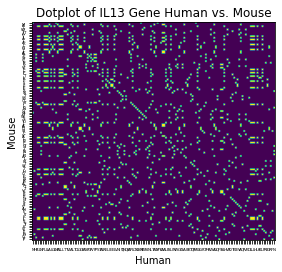

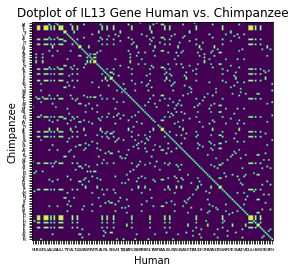

In [3]:
#stores the IL13 gene sequence of human and mouse into the variable X and Y respectively
X, Y = human, mouse

#stores the human and mouse variables as an array
X, Y = np.array(list(X)), np.array(list(Y))

#plots the two arrays and where the sequence matches a dot is made otherwise there are no marks made
plt.imshow(X==Y[:,None])

#labels the x-axis ticks with the mouse sequence, size adjusts the size of the letters on the ticks 
plt.xticks(np.arange(len(X)), X, size = 4)

#labels the y-axis ticks with the mouse sequence, size adjusts the size of the letters on the ticks  
plt.yticks(np.arange(len(Y)), Y, size = 4)

#x-axis label
plt.xlabel('Human')

#y-axis label
plt.ylabel('Mouse')

#title label
plt.title('Dotplot of IL13 Gene Human vs. Mouse')

#displays the plot
plt.show()

# repeat of the code for the dotplot above but with the chimpanzee IL13 sequence instead of mouse
X, Y = human, chimpanzee
X, Y = np.array(list(X)), np.array(list(Y))

plt.imshow(X==Y[:,None])
plt.xticks(np.arange(len(X)), X, size = 4)
plt.yticks(np.arange(len(Y)), Y, size = 4)
plt.xlabel('Human')
plt.ylabel('Chimpanzee')
plt.title('Dotplot of IL13 Gene Human vs. Chimpanzee')
plt.show()


### Part 4: Analysis of the results

The dotplot above shows the similarities between the sequences of the Interleukin-13 gene of a human and mouse, and of a human and chimpanzee.  There are numerous breaks in the dotplot between the human and mouse when compared to the near continuous line of dots for the plot of the IL13 gene between the human and chimpanzee sequences.  The window size and stringency were both set to a default of one so the sequences were required to match the human gene sequence only by one base at a time.  There may be other alignments scattered thoughout the plot but the focus is on the larger diagonal line in the center of each plot.  There are some areas that appear as squares, those are regions where there are repeats in the sequence.  The gaps in the mouse/human dotplot show regions where the sequences do not match up, likely due to mutations the the genome that distinguishes the two species.  A pairwise alignment was done of the mouse and chimpanzee gene sequences comparing the to the standard of a human gene sequence.  The mouse pairwise alignment score was 168 while the chimpanzee was 184, meaning that there were more similar regions in the chimpanzee sequence than that of the mouse.  These tests prove the hypothesis to be true and that the chimpanzee would be a better to use as a model for testing.

